# Tugas Analisis Multimedia: **Image (Citra Digital)**

**Mata Kuliah:** Sistem & Teknologi Multimedia  
**Nama:** Muhammad Yusuf
**NIM:** 122140193

---

## Deskripsi Tugas

Tugas ini bertujuan untuk memahami **representasi dasar data citra digital (image)** melalui praktik langsung memuat data, visualisasi komponen warna, serta melakukan analisis spasial sederhana menggunakan berbagai teknik dasar pengolahan citra.

Anda akan bekerja dengan satu atau beberapa gambar (foto diri, objek, atau lingkungan sekitar) untuk:

* Mengamati struktur data piksel dan channel warna (RGB, Grayscale, HSV, dsb.)
* Menganalisis perbedaan hasil visualisasi antar representasi warna
* Melakukan eksplorasi sederhana terhadap transformasi citra (cropping, filtering, edge detection, dll.)
* Menyimpulkan pengaruh setiap tahap pemrosesan terhadap persepsi visual

Fokus tugas ini adalah pada **pemahaman konsep representasi spasial citra digital** dan **interpretasi hasil visualisasi**, **bukan** pada manipulasi kompleks atau penerapan model pembelajaran mesin.

In [21]:
# imports needed
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import mediapipe as mp

### **Soal 1 — Cropping dan Konversi Warna**

* Ambil sebuah gambar diri Anda (*selfie*) menggunakan kamera atau smartphone.
* Lakukan **cropping secara manual** untuk menghasilkan dua potongan:

  * Cropping **kotak persegi pada area wajah**.
  * Cropping **persegi panjang pada area latar belakang**.
* Resize hasil crop menjadi **920×920 piksel**.
* Konversi gambar menjadi **grayscale** dan **HSV**, lalu tampilkan ketiganya berdampingan.
* Tambahkan **anotasi teks** berisi nama Anda di atas kepala pada gambar hasil crop.

  * Gaya teks (font, warna, posisi, ukuran, ketebalan) **dibebaskan**.
* Jelaskan efek **cropping** dan **perubahan warna** menggunakan **Markdown**.


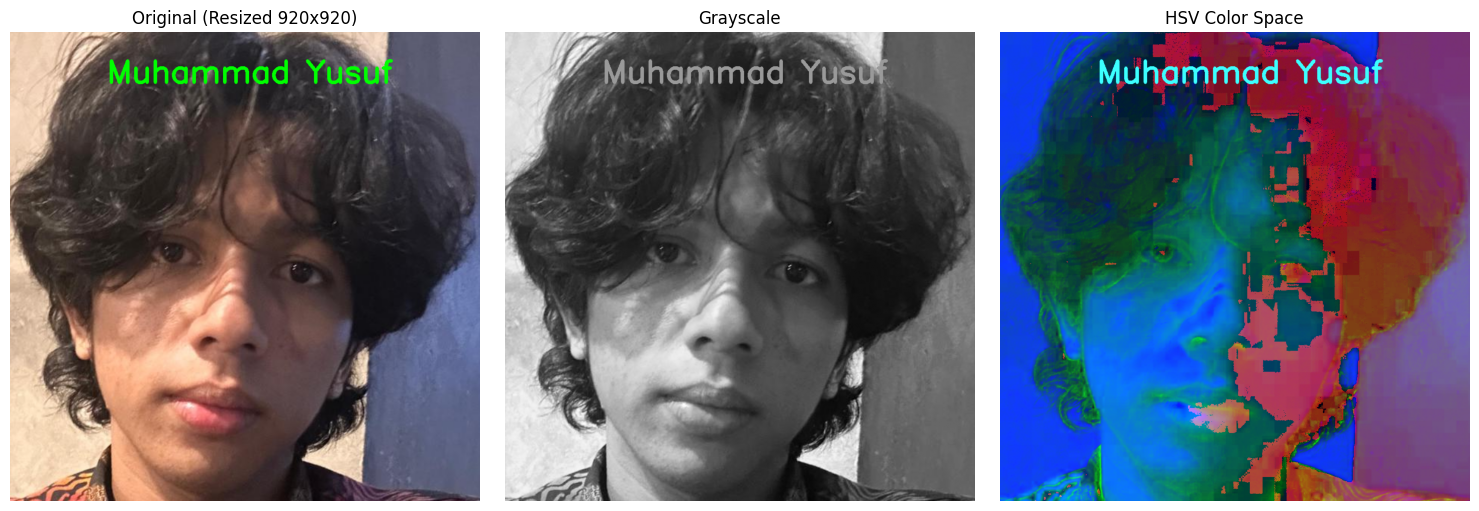

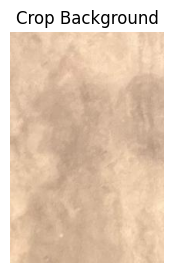

Processed image saved to: c:\Users\muham\OneDrive\Desktop\sistem-teknologi-multimedia-122140193\worksheet4\data\selfie_processed.jpg


In [16]:
# Fungsi untuk memproses crop, resize, anotasi, dan konversi warna
def process_selfie_assignment(image_path):
    img = cv2.imread(image_path)
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    # 1. Crop Wajah (Kotak Persegi) - Estimasi koordinat wajah
    # Koordinat formatnya [y_start:y_end, x_start:x_end]
    face_crop = img_rgb[30:650, 230:850]

    # 2. Crop Latar Belakang (Persegi Panjang) - Mengambil area dinding di kiri
    bg_crop = img_rgb[300:600, 0:200]

    # 3. Resize hasil crop wajah menjadi 920x920 piksel
    face_resized = cv2.resize(face_crop, (920, 920), interpolation=cv2.INTER_LINEAR)

    # 4. Tambahkan Anotasi Teks (Nama di atas kepala)
    cv2.putText(face_resized, "Muhammad Yusuf", (190, 100), cv2.FONT_HERSHEY_SIMPLEX, 2, (0, 255, 0), 5)

    # 5. Konversi Warna (Grayscale & HSV)
    face_gray = cv2.cvtColor(face_resized, cv2.COLOR_RGB2GRAY)
    face_hsv = cv2.cvtColor(face_resized, cv2.COLOR_RGB2HSV)

    # Plotting: Tampilkan RGB (dengan Teks), Grayscale, dan HSV berdampingan
    fig, ax = plt.subplots(1, 3, figsize=(15, 5))
    
    ax[0].imshow(face_resized)
    ax[0].set_title("Original (Resized 920x920)")
    ax[0].axis('off')

    ax[1].imshow(face_gray, cmap='gray')
    ax[1].set_title("Grayscale")
    ax[1].axis('off')

    ax[2].imshow(face_hsv)
    ax[2].set_title("HSV Color Space")
    ax[2].axis('off')

    plt.tight_layout()
    plt.show()

    # Opsional: Tampilkan crop background terpisah
    plt.figure(figsize=(3,3))
    plt.imshow(bg_crop)
    plt.title("Crop Background")
    plt.axis('off')
    plt.show()
    
    # Save cropped and resized face image with annotation
    output_path = os.path.join(os.getcwd(), 'data', 'selfie_processed.jpg')
    cv2.imwrite(output_path, cv2.cvtColor(face_resized, cv2.COLOR_RGB2BGR))
    print(f"Processed image saved to: {output_path}")

# Jalankan fungsi dengan path gambar selfie
selfie_img_path = os.path.join(os.getcwd(), 'data', 'selfie.jpg')
process_selfie_assignment(selfie_img_path)

## Analisis Soal No.1   

Pada tugas ini saya melakukan cropping wajah berbentuk persegi sehingga fokus gambar hanya ke area muka tanpa gangguan objek lain, yang diimplementasikan pada baris `face_crop = img_rgb[30:650, 230:850]`, lalu juga mengambil crop persegi panjang di bagian dinding sebagai contoh background pada `bg_crop = img_rgb[300:600, 0:200];` setelah itu hasil crop wajah saya resize ke 920×920 lewat `face_resized = cv2.resize(face_crop, (920, 920), ...)` dan menambahkan teks “Muhammad Yusuf” di atas kepala sebagai identitas dengan `cv2.putText(...)`. Konversi warna ke grayscale dilakukan oleh `face_gray = cv2.cvtColor(face_resized, cv2.COLOR_RGB2GRAY)` sehingga detail terang–gelap di wajah (bayangan, kontur, tekstur) jadi lebih kelihatan karena informasi warna dihilangkan, sedangkan konversi ke HSV pada `face_hsv = cv2.cvtColor(face_resized, cv2.COLOR_RGB2HSV)` membuat tampilan jadi seperti “false color” tapi sebenarnya memisahkan hue, saturation, dan value sehingga perbedaan antara warna kulit dan latar belakang lebih jelas untuk keperluan analisis atau segmentasi warna, meskipun tampilannya tidak senatural gambar RGB asli.

### **Soal 2 — Manipulasi Channel Warna RGB**

* Gunakan gambar hasil crop dari Soal 1.
* Konversikan gambar ke ruang warna **RGB**.
* Lakukan manipulasi channel warna dengan cara:

  * **Naikkan intensitas channel merah sebanyak 50 poin** (maksimum 255).
  * **Turunkan intensitas channel biru sebanyak 30 poin** (minimum 0).
* Teknik atau cara menaikkan/menurunkan intensitas **dibebaskan**, asalkan logis dan hasilnya terlihat.
* Gabungkan kembali channel warna dan **simpan gambar hasil modifikasi dalam format `.png`**.
* **Tampilkan histogram per channel (R, G, B)** untuk gambar asli dan hasil modifikasi menggunakan `matplotlib.pyplot.hist`.
* Jelaskan dampak perubahan RGB pada warna gambar dalam sel **Markdown**.


Gambar modifikasi disimpan di: c:\Users\muham\OneDrive\Desktop\sistem-teknologi-multimedia-122140193\worksheet4\data\selfie_modified_rgb.png


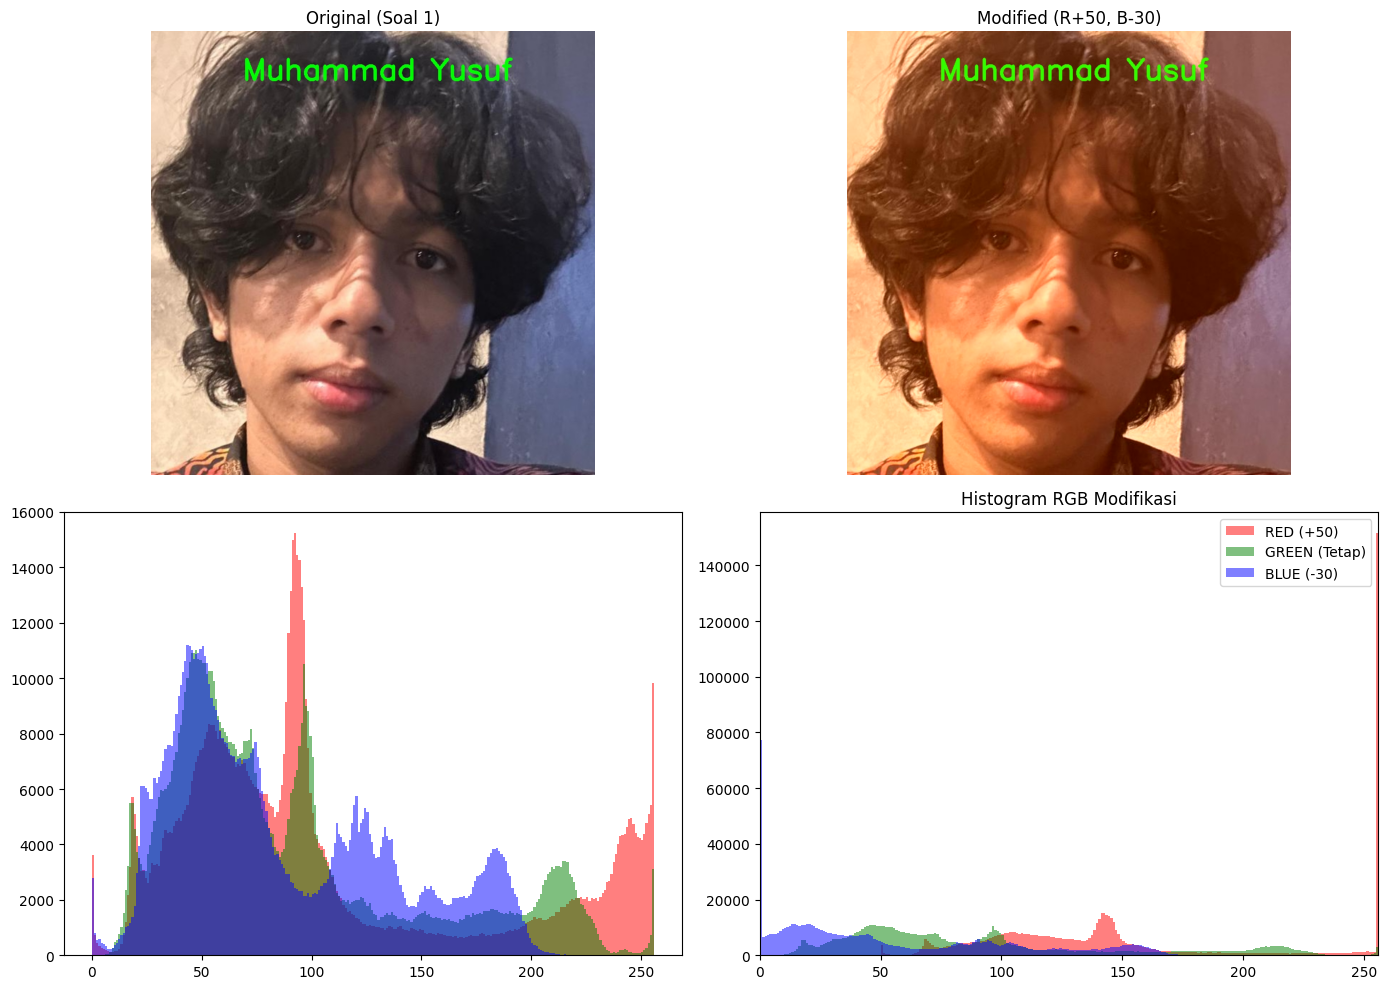

In [18]:
# Fungsi manipulasi channel RGB (R+50, B-30) dan menampilkan histogram perbandingan
def manipulate_rgb_channels(image_path):
    # Load gambar hasil Soal 1
    if not os.path.exists(image_path):
        print("File tidak ditemukan, pastikan path benar.")
        return

    img = cv2.imread(image_path)
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    # Pisahkan channel warna (Split)
    r, g, b = cv2.split(img_rgb)

    # Manipulasi Channel: Merah +50 dan Biru -30 (Gunakan cv2.add/subtract untuk clamping otomatis 0-255)
    r_mod = cv2.add(r, 50)      # Jika hasil > 255, akan mentok di 255
    b_mod = cv2.subtract(b, 30) # Jika hasil < 0, akan mentok di 0
    # Channel Green (g) dibiarkan tetap

    # Gabungkan kembali channel (Merge)
    img_mod = cv2.merge([r_mod, g, b_mod])

    # Simpan gambar hasil modifikasi (.png)
    output_path = os.path.join(os.getcwd(), 'data', 'selfie_modified_rgb.png')
    cv2.imwrite(output_path, cv2.cvtColor(img_mod, cv2.COLOR_RGB2BGR))
    print(f"Gambar modifikasi disimpan di: {output_path}")

    # Plotting Gambar dan Histogram
    fig, ax = plt.subplots(2, 2, figsize=(14, 10))

    # 1. Tampilkan Gambar Asli vs Modifikasi
    ax[0, 0].imshow(img_rgb)
    ax[0, 0].set_title("Original (Soal 1)")
    ax[0, 0].axis('off')

    ax[0, 1].imshow(img_mod)
    ax[0, 1].set_title("Modified (R+50, B-30)")
    ax[0, 1].axis('off')

    # 2. Tampilkan Histogram
    colors = ('red', 'green', 'blue')
    
    # Histogram Asli
    for i, color in enumerate(colors):
        ax[1, 0].hist(
            img_rgb[:, :, i].ravel(),
            bins=256,
            range=(0, 256),
            color=color,
            alpha=0.5,
            label=color.upper()
        )

    # Histogram Modifikasi
    ax[1, 1].hist(r_mod.ravel(), bins=256, range=(0, 256), color='red',   alpha=0.5, label='RED (+50)')
    ax[1, 1].hist(g.ravel(),     bins=256, range=(0, 256), color='green', alpha=0.5, label='GREEN (Tetap)')
    ax[1, 1].hist(b_mod.ravel(), bins=256, range=(0, 256), color='blue',  alpha=0.5, label='BLUE (-30)')
    ax[1, 1].set_title("Histogram RGB Modifikasi")
    ax[1, 1].legend()
    ax[1, 1].set_xlim([0, 256])

    plt.tight_layout()
    plt.show()

# Jalankan fungsi dengan path gambar hasil soal 1
cropped_image = os.path.join(os.getcwd(), 'data', 'selfie_processed.jpg')
manipulate_rgb_channels(cropped_image)

## Analisis Soal No.2   

Pada Soal 2, saya memanipulasi channel warna gambar hasil crop dari Soal 1 dengan cara **menaikkan intensitas merah +50** dan **menurunkan biru −30** menggunakan `r_mod = cv2.add(r, 50)` dan `b_mod = cv2.subtract(b, 30)`, lalu menggabungkannya lagi dengan `img_mod = cv2.merge([r_mod, g, b_mod])` dan menyimpannya sebagai `.png`. Secara visual, efeknya membuat keseluruhan gambar jadi lebih hangat: kulit dan dinding cenderung ke arah **oranye/kemerahan**, sementara nuansa kebiruan pada bayangan dan background berkurang karena channel biru dikurangi. Hal ini tercermin di histogram: pada gambar modifikasi, kurva **RED** bergeser ke kanan (nilai piksel lebih tinggi), kurva **BLUE** bergeser ke kiri (nilai piksel lebih rendah), sedangkan **GREEN** relatif tetap karena tidak dimodifikasi. Kombinasi R yang lebih tinggi dan B yang lebih rendah inilah yang menggeser tone warna foto dari netral menjadi lebih warm tanpa mengubah struktur atau detail objek pada gambar.


### **Soal 3 — Deteksi Tepi dan Filter Citra**

* Ambil gambar **objek dengan background bertekstur** (misalnya kain bermotif, jerami, atau batu).
* Terapkan **edge detection (Canny)** dan tampilkan hasilnya.
* Lakukan **thresholding dengan nilai ambang tertentu** (bebas Anda tentukan) agar hanya objek utama yang tersisa.
* Buat **bounding box** di sekitar objek hasil segmentasi (boleh manual atau otomatis).
* Terapkan **filter blur** dan **filter sharpening**, lalu **bandingkan hasil keduanya**.
* Jelaskan bagaimana setiap filter memengaruhi detail gambar dalam format **Markdown**.


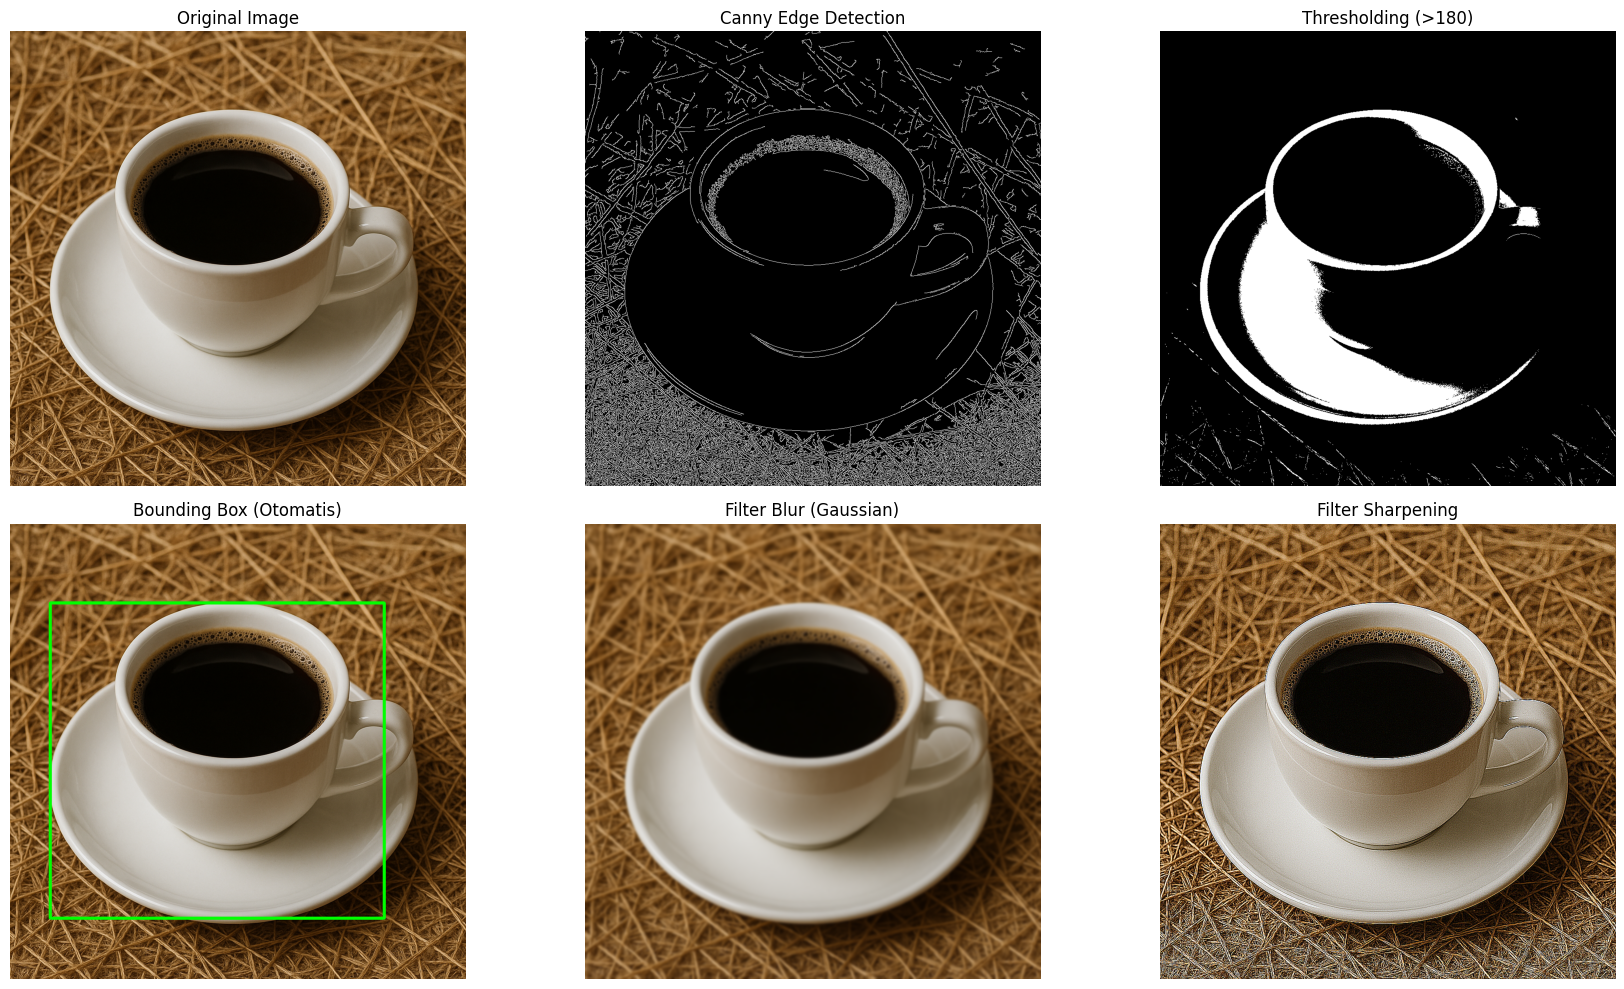

In [20]:
# Fungsi untuk edge detection, thresholding otomatis bounding box, dan komparasi filter blur vs sharpen
def process_coffee_assignment(image_path):
    # Pastikan file ada
    if not os.path.exists(image_path):
        print(f"Error: File {image_path} tidak ditemukan.")
        return

    img = cv2.imread(image_path)
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # 1. Edge Detection (Canny)
    # Menggunakan threshold lebar untuk menangkap tekstur jerami dan pinggiran cangkir
    edges = cv2.Canny(gray, 50, 150)

    # 2. Thresholding (Segmentasi Objek)
    # Karena cangkir putih terang & background agak gelap, kita ambil piksel > 160
    _, binary_thresh = cv2.threshold(gray, 180, 255, cv2.THRESH_BINARY)

    # 3. Bounding Box Otomatis (Mencari kontur terbesar dari hasil threshold)
    contours, _ = cv2.findContours(binary_thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    img_bbox = img_rgb.copy()
    
    if contours:
        # Ambil kontur dengan area terbesar (asumsi itu cangkir)
        largest_contour = max(contours, key=cv2.contourArea)
        x, y, w, h = cv2.boundingRect(largest_contour)
        # Gambar kotak hijau
        cv2.rectangle(img_bbox, (x, y), (x + w, y + h), (0, 255, 0), 5)

    # 4. Filter Blur (Gaussian)
    blurred = cv2.GaussianBlur(img_rgb, (15, 15), 0)

    # 5. Filter Sharpening (Kernel Konvolusi)
    sharpening_kernel = np.array([[-1, -1, -1], 
                                  [-1,  9, -1], 
                                  [-1, -1, -1]])
    sharpened = cv2.filter2D(img_rgb, -1, sharpening_kernel)

    # Plotting Hasil
    fig, axs = plt.subplots(2, 3, figsize=(18, 10))
    
    # Baris 1: Analisis Struktur
    axs[0, 0].imshow(img_rgb)
    axs[0, 0].set_title("Original Image")
    axs[0, 0].axis('off')

    axs[0, 1].imshow(edges, cmap='gray')
    axs[0, 1].set_title("Canny Edge Detection")
    axs[0, 1].axis('off')

    axs[0, 2].imshow(binary_thresh, cmap='gray')
    axs[0, 2].set_title("Thresholding (>180)")
    axs[0, 2].axis('off')

    # Baris 2: Object Detection & Filters
    axs[1, 0].imshow(img_bbox)
    axs[1, 0].set_title("Bounding Box (Otomatis)")
    axs[1, 0].axis('off')

    axs[1, 1].imshow(blurred)
    axs[1, 1].set_title("Filter Blur (Gaussian)")
    axs[1, 1].axis('off')

    axs[1, 2].imshow(sharpened)
    axs[1, 2].set_title("Filter Sharpening")
    axs[1, 2].axis('off')

    plt.tight_layout()
    plt.show()

# Load dan jalankan fungsi
coffe_path_image = os.path.join(os.getcwd(), 'data', 'coffe-by-sora-ai.png') 
process_coffee_assignment(coffe_path_image)

## Analisis Soal No.3   

Pada Soal 3 ini saya mengambil gambar cangkir kopi dengan background jerami yang bertekstur, lalu menerapkan beberapa tahap pemrosesan. Deteksi tepi dilakukan dengan **Canny** pada `edges = cv2.Canny(gray, 50, 150)` sehingga garis-garis tepi cangkir dan tekstur jerami jadi terlihat jelas dalam bentuk garis putih di atas background hitam. Setelah itu saya melakukan **thresholding** dengan ambang `>180` pada `cv2.threshold(gray, 180, 255, cv2.THRESH_BINARY)`, yang membuat area cangkir dan piring (yang lebih terang) menjadi putih dan background lebih banyak terbuang menjadi hitam, sehingga objek utama lebih tersegmentasi. Dari citra biner ini saya mencari kontur terbesar lewat `cv2.findContours(...)` dan mengambil **bounding box otomatis** menggunakan `x, y, w, h = cv2.boundingRect(largest_contour)` lalu menggambar kotak hijau di sekitar cangkir pada `cv2.rectangle(...)`. Untuk efek filter, **Gaussian blur** pada `blurred = cv2.GaussianBlur(img_rgb, (15, 15), 0)` membuat gambar tampak lebih halus: detail halus pada jerami dan tekstur permukaan kopi berkurang sehingga kesan lembut meningkat tapi ketajaman menurun. Sebaliknya, **filter sharpening** dengan kernel `[-1 -1 -1; -1 9 -1; -1 -1 -1]` di `sharpened = cv2.filter2D(...)` justru menonjolkan tepi dan detail: garis cangkir, tekstur jerami, dan batas antara kopi dan busanya terlihat lebih tajam, namun sekaligus membuat noise kecil dan pola di background menjadi lebih kontras dan “kasar” dibandingkan gambar asli maupun hasil blur.


### **Soal 4 — Deteksi Wajah dan Filter Digital Kreatif**

* Ambil gambar diri Anda dengan ekspresi wajah **netral**.
* Lakukan **deteksi wajah dan landmark** menggunakan salah satu dari:

  * **MediaPipe**, atau
  * **Dlib**, atau
  * **OpenCV**.
* Buat **overlay filter digital kreatif** karya Anda sendiri, misalnya:

  * topi, kumis, masker, helm, aksesoris, atau bentuk unik lainnya.
  * Filter boleh dibuat dari **gambar eksternal (PNG)** *atau* digambar langsung (misal bentuk lingkaran, garis, poligon, dll).
* Pastikan posisi overlay menyesuaikan **landmark wajah** dengan logis.
* **Gunakan alpha blending sebagai saran** agar hasil tampak lebih natural.
* Tampilkan perbandingan antara **gambar asli** dan **hasil dengan filter**.
* Jelaskan bagaimana Anda menghitung posisi overlay dan tantangan yang dihadapi selama implementasi (gunakan **Markdown**).

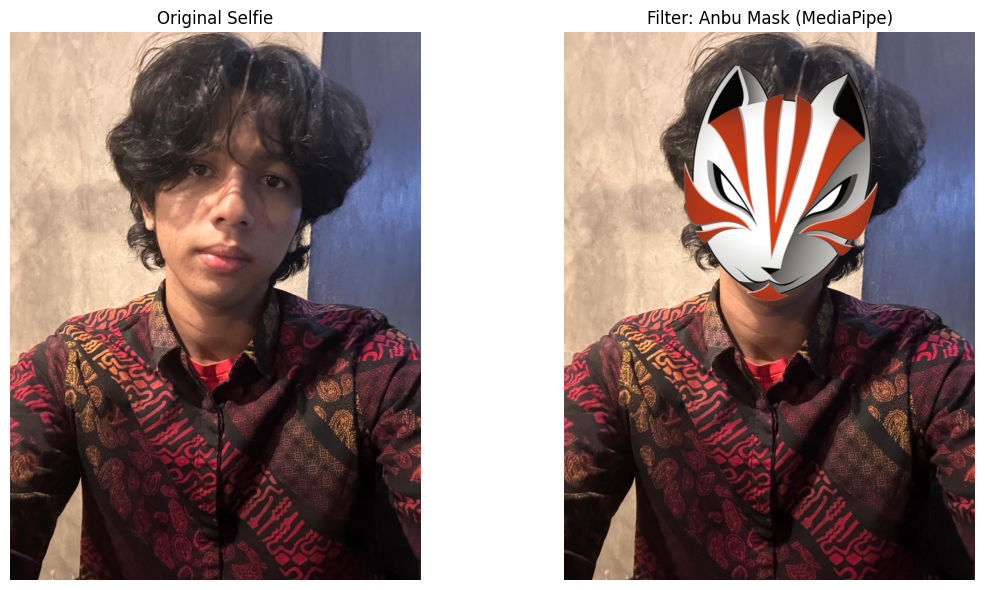

In [33]:
# Fungsi untuk menempelkan overlay transparan (PNG) ke background berdasarkan posisi
def overlay_image_alpha(img, img_overlay, pos, size):
    x, y = pos
    w, h = size
    
    # Resize overlay sesuai ukuran target wajah
    img_overlay = cv2.resize(img_overlay, (w, h))

    # Ambil dimensi background
    h_bg, w_bg, _ = img.shape

    # Clipping (pastikan overlay tidak keluar batas gambar)
    y1, y2 = max(0, y), min(h_bg, y + h)
    x1, x2 = max(0, x), min(w_bg, x + w)

    y1_o, y2_o = max(0, -y), min(h, h - (y + h - h_bg))
    x1_o, x2_o = max(0, -x), min(w, w - (x + w - w_bg))

    if y1 >= y2 or x1 >= x2 or y1_o >= y2_o or x1_o >= x2_o:
        return img

    # Ambil region of interest (ROI)
    roi = img[y1:y2, x1:x2]
    overlay_crop = img_overlay[y1_o:y2_o, x1_o:x2_o]

    # Pisahkan alpha channel dan color channel
    alpha = overlay_crop[:, :, 3] / 255.0
    color = overlay_crop[:, :, :3]

    # Lakukan Alpha Blending: (Overlay * Alpha) + (Background * (1 - Alpha))
    for c in range(0, 3):
        roi[:, :, c] = (alpha * color[:, :, c] + (1 - alpha) * roi[:, :, c])

    img[y1:y2, x1:x2] = roi
    return img

# Fungsi utama deteksi wajah dan penerapan filter topeng Anbu
def apply_anbu_mask(image_path, mask_path):
    if not os.path.exists(image_path) or not os.path.exists(mask_path):
        print("File gambar atau mask tidak ditemukan.")
        return

    # Inisialisasi MediaPipe Face Mesh
    mp_face_mesh = mp.solutions.face_mesh
    face_mesh = mp_face_mesh.FaceMesh(static_image_mode=True, max_num_faces=1, refine_landmarks=True)

    img = cv2.imread(image_path)
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    mask_img = cv2.imread(mask_path, -1) # Load with Alpha Channel

    results = face_mesh.process(img_rgb)

    img_result = img_rgb.copy()

    if results.multi_face_landmarks:
        for face_landmarks in results.multi_face_landmarks:
            h_img, w_img, _ = img.shape
            
            # Ambil koordinat kunci: Pipi Kiri (234), Pipi Kanan (454), Dagu (152), Dahi (10)
            left_cheek = face_landmarks.landmark[234]
            right_cheek = face_landmarks.landmark[454]
            forehead = face_landmarks.landmark[10]
            chin = face_landmarks.landmark[152]

            # Konversi ke koordinat piksel
            x_left, y_left = int(left_cheek.x * w_img), int(left_cheek.y * h_img)
            x_right, y_right = int(right_cheek.x * w_img), int(right_cheek.y * h_img)
            x_top, y_top = int(forehead.x * w_img), int(forehead.y * h_img)
            x_bottom, y_bottom = int(chin.x * w_img), int(chin.y * h_img)

            # Hitung lebar dan tinggi wajah untuk ukuran topeng
            face_width = np.linalg.norm([x_right - x_left, y_right - y_left])
            face_height = np.linalg.norm([x_bottom - x_top, y_bottom - y_top])

            # Scaling factor (topeng biasanya sedikit lebih besar dari landmark wajah)
            scale_w = 1.3
            scale_h = 1.3
            
            mask_w = int(face_width * scale_w)
            mask_h = int(face_height * scale_h)

            # Tentukan posisi topeng (center di hidung/tengah wajah, lalu geser ke kiri atas)
            center_x = (x_left + x_right) // 2
            center_y = (y_top + y_bottom) // 2
            
            # Offset manual agar pas (geser x dan y supaya topeng di tengah muka)
            pos_x = center_x - (mask_w // 2)
            pos_y = center_y - (mask_h // 2)
            
            # Naikan sedikit posisi y supaya topeng pas di muka
            pos_y += -60
            
            # Rotate anbu mask -6 derajat
            M = cv2.getRotationMatrix2D((mask_img.shape[1]//2, mask_img.shape[0]//2), -6, 1)
            mask_img = cv2.warpAffine(mask_img, M, (mask_img.shape[1], mask_img.shape[0]))

            # Terapkan overlay
            img_result = img.copy()
            img_result = overlay_image_alpha(img_result, mask_img, (pos_x, pos_y), (mask_w, mask_h))

    # Tampilkan Hasil
    fig, ax = plt.subplots(1, 2, figsize=(12, 6))
    
    ax[0].imshow(img_rgb)
    ax[0].set_title("Original Selfie")
    ax[0].axis('off')

    ax[1].imshow(cv2.cvtColor(img_result, cv2.COLOR_BGR2RGB))
    ax[1].set_title("Filter: Anbu Mask (MediaPipe)")
    ax[1].axis('off')

    plt.tight_layout()
    plt.show()

# Jalankan fungsi
selfie_img_path = os.path.join(os.getcwd(), 'data', 'selfie.jpg')
anbumasuk_path = os.path.join(os.getcwd(), 'data', 'anbu-mask.png')
apply_anbu_mask(selfie_img_path, anbumasuk_path)

## Analisis Soal No.4   

Pada Soal 4 ini saya menggunakan **MediaPipe Face Mesh** untuk mendeteksi wajah dan landmark, lalu menempelkan filter topeng Anbu berbasis PNG dengan alpha channel. Landmark yang dipakai adalah pipi kiri (234), pipi kanan (454), dahi (10), dan dagu (152); koordinatnya saya ambil di kode `left_cheek = face_landmarks.landmark[234]` dan seterusnya, lalu saya ubah ke piksel dengan mengalikan lebar–tinggi gambar. Dari dua pipi dan dahi–dagu ini saya hitung **lebar** dan **tinggi** wajah dengan `face_width` dan `face_height`, kemudian dikalikan faktor skala `scale_w` dan `scale_h` (1.3) untuk menentukan ukuran masker (`mask_w`, `mask_h`) supaya sedikit lebih besar dari wajah. Posisi tengah masker saya letakkan di tengah wajah dengan `center_x` dan `center_y`, lalu dikonversi ke pojok kiri atas overlay melalui `pos_x` dan `pos_y`, yang kemudian saya geser sedikit ke atas (`pos_y += -60`) supaya topeng pas menutupi muka. Sebelum ditempel, gambar masker saya rotasi sedikit (`cv2.getRotationMatrix2D` dan `cv2.warpAffine`) agar mengikuti kemiringan wajah, lalu ditumpuk ke gambar asli lewat fungsi `overlay_image_alpha`, yang melakukan **alpha blending** `(Overlay * alpha + Background * (1 - alpha))` di region of interest sehingga hasilnya terlihat lebih natural. Tantangan utama ada di pemilihan index landmark yang tepat, penentuan faktor skala dan offset agar masker tidak terlalu kecil/besar, serta memastikan overlay tidak keluar batas gambar (diatasi dengan clipping koordinat dalam `overlay_image_alpha`).


### **Soal 5 — Perspektif dan Peningkatan Kualitas Citra**

* Ambil gambar **objek datar** seperti karya tangan di kertas, tulisan di papan tulis, atau foto produk di meja dengan kondisi pencahayaan atau sudut yang tidak ideal.
* Lakukan **preprocessing** untuk memperbaiki tampilan agar lebih rapi dan jelas, dengan langkah-langkah:

  * Konversi ke **grayscale**.
  * **Koreksi perspektif (transformasi homografi)** menggunakan **4 titik manual** agar objek terlihat sejajar dan tidak terdistorsi.
  * Terapkan **thresholding adaptif atau Otsu** (pilih salah satu, dan jelaskan alasan pilihan Anda).
* Tampilkan **setiap tahap pemrosesan dalam satu grid** agar mudah dibandingkan.
* Jelaskan fungsi masing-masing tahap dan bagaimana teknik ini meningkatkan kualitas visual citra (gunakan **Markdown**).

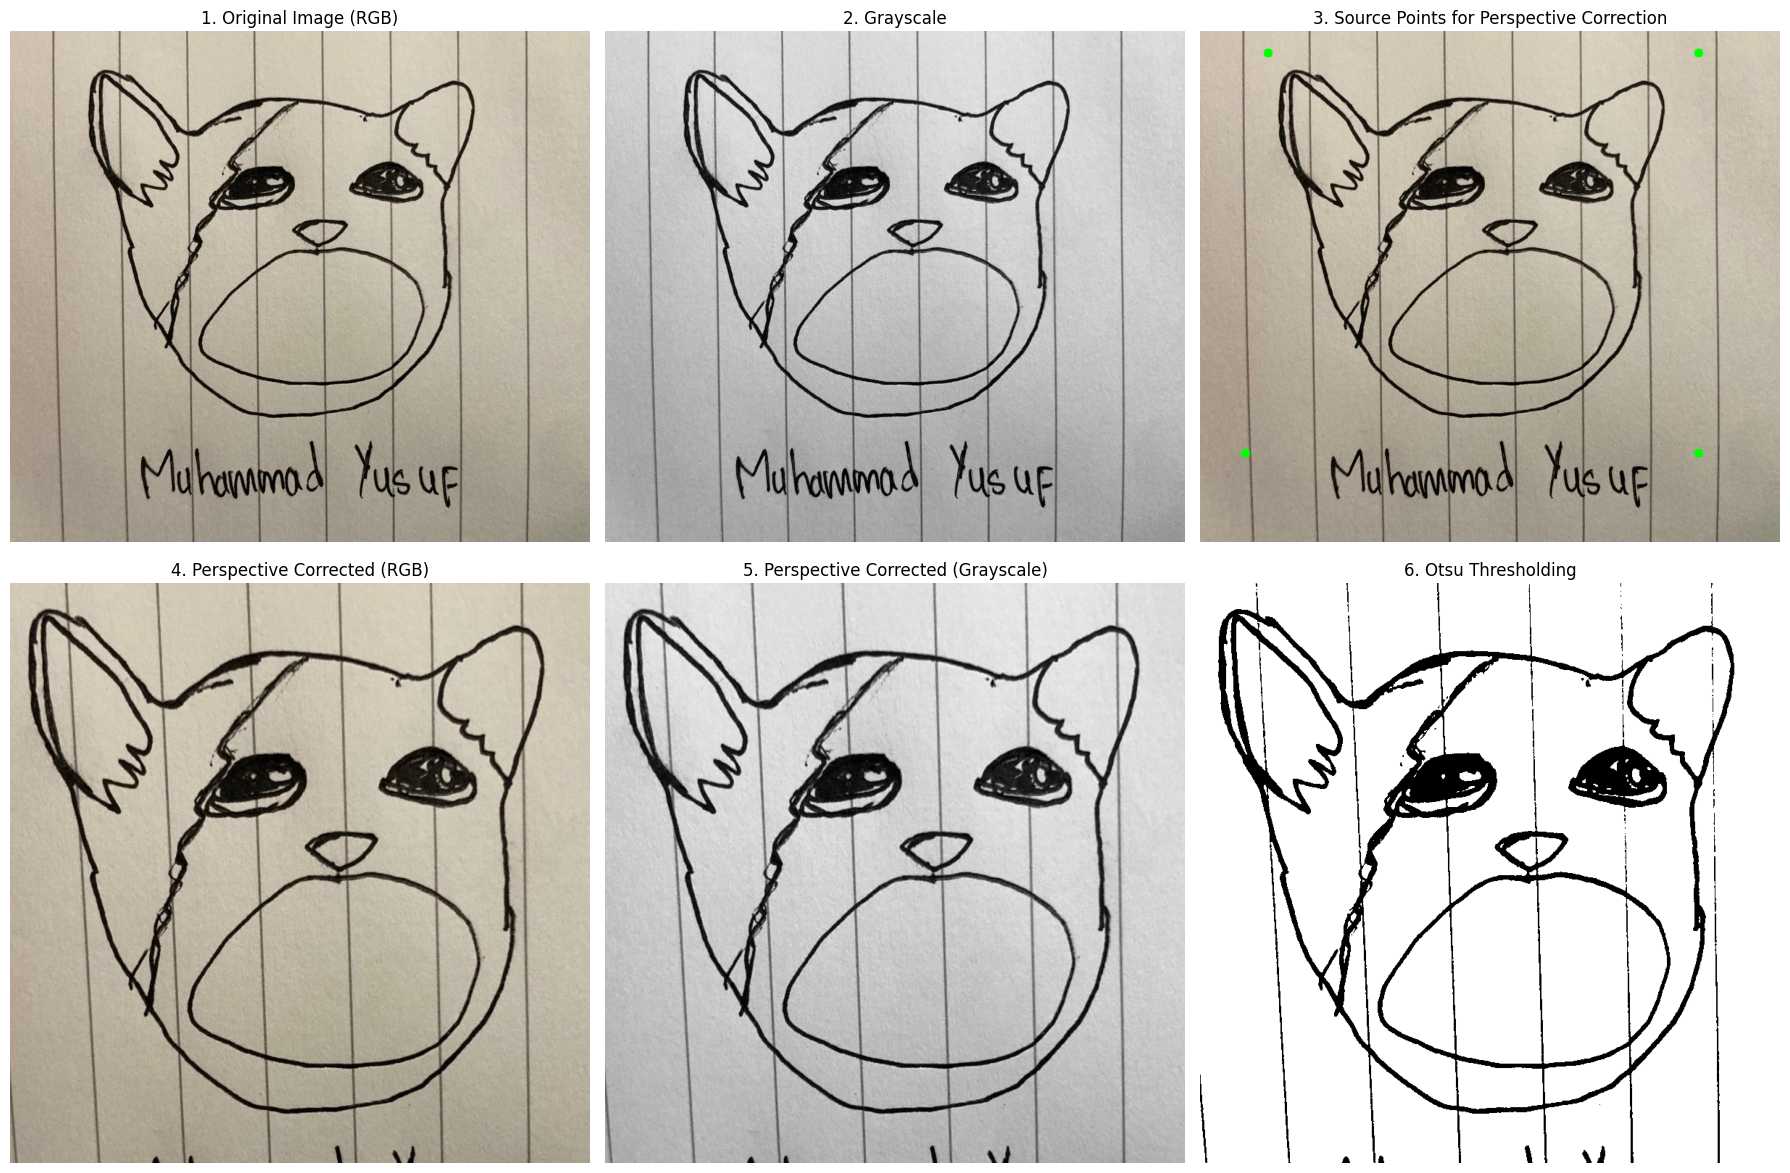

In [ ]:
# Fungsi untuk koreksi perspektif dan peningkatan kualitas citra
def process_drawing_assignment(image_path):
    if not os.path.exists(image_path):
        print("File gambar tidak ditemukan.")
        return

    img = cv2.imread(image_path)
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # 1. Preprocessing: Grayscale (sudah dilakukan di awal)

    # 2. Koreksi Perspektif (Transformasi Homografi) - 4 Titik Manual
    # Ini adalah titik-titik pada gambar asli (pojok karya seni/kertas)
    # Urutan: Top-Left, Top-Right, Bottom-Right, Bottom-Left
    pts_src = np.array([
        [150, 48],  # Kiri atas gambar kucing
        [1100, 48],  # Kanan atas gambar kucing
        [1100, 930], # Kanan bawah (dekat tulisan Yusuf)
        [100, 930]  # Kiri bawah (dekat tulisan Muhammad)
    ], dtype=np.float32)

    # Titik tujuan (untuk persegi panjang sempurna)
    # Ukuran target (misal 600x800 atau sesuaikan rasio asli)
    target_width = 800
    target_height = 800
    pts_dst = np.array([
        [0, 0],
        [target_width - 1, 0],
        [target_width - 1, target_height - 1],
        [0, target_height - 1]
    ], dtype=np.float32)

    # Hitung matriks homografi
    matrix = cv2.getPerspectiveTransform(pts_src, pts_dst)
    # Terapkan transformasi ke gambar grayscale
    warped_gray = cv2.warpPerspective(gray, matrix, (target_width, target_height))
    # Terapkan transformasi ke gambar RGB untuk perbandingan
    warped_rgb = cv2.warpPerspective(img_rgb, matrix, (target_width, target_height))

    # 3. Thresholding (Otsu Thresholding)
    # Otsu bekerja paling baik pada gambar grayscale dengan dua mode (foreground/background)
    _, otsu_thresh = cv2.threshold(warped_gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

    # Plotting setiap tahap pemrosesan dalam satu grid
    fig, axs = plt.subplots(2, 3, figsize=(18, 12)) # 2 baris, 3 kolom

    # Gambar Asli (RGB)
    axs[0, 0].imshow(img_rgb)
    axs[0, 0].set_title("1. Original Image (RGB)")
    axs[0, 0].axis('off')

    # Grayscale
    axs[0, 1].imshow(gray, cmap='gray')
    axs[0, 1].set_title("2. Grayscale")
    axs[0, 1].axis('off')

    # Gambar Asli dengan Titik Sumber (untuk visualisasi)
    img_pts = img_rgb.copy()
    for pt in pts_src:
        cv2.circle(img_pts, (int(pt[0]), int(pt[1])), 10, (0, 255, 0), -1) # Titik hijau
    axs[0, 2].imshow(img_pts)
    axs[0, 2].set_title("3. Source Points for Perspective Correction")
    axs[0, 2].axis('off')

    # Hasil Koreksi Perspektif (RGB)
    axs[1, 0].imshow(warped_rgb)
    axs[1, 0].set_title("4. Perspective Corrected (RGB)")
    axs[1, 0].axis('off')

    # Hasil Koreksi Perspektif (Grayscale)
    axs[1, 1].imshow(warped_gray, cmap='gray')
    axs[1, 1].set_title("5. Perspective Corrected (Grayscale)")
    axs[1, 1].axis('off')

    # Hasil Otsu Thresholding
    axs[1, 2].imshow(otsu_thresh, cmap='gray')
    axs[1, 2].set_title("6. Otsu Thresholding")
    axs[1, 2].axis('off')

    plt.tight_layout()
    plt.show()

# Jalankan fungsi
drawing_image_path = os.path.join(os.getcwd(), 'data', 'cat-draw.jpg')
process_drawing_assignment(drawing_image_path)

## Analisis Soal No.5   

Pada Soal 5 ini saya memproses foto gambar kucing di kertas yang awalnya agak miring dan gelap agar terlihat seperti hasil scan yang rapi. Pertama, gambar saya ubah ke **grayscale** dengan `gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)` supaya informasi warna yang tidak penting hilang dan pemrosesan berikutnya fokus ke perbedaan terang–gelap saja. Lalu saya lakukan **koreksi perspektif** dengan menentukan 4 titik manual di sekitar area gambar (`pts_src = [...]`) dan memetakkannya ke bentuk persegi yang rapi (`pts_dst = [...]`), kemudian menghitung homografi memakai `cv2.getPerspectiveTransform(pts_src, pts_dst)` dan menerapkannya dengan `cv2.warpPerspective(...)`; hasilnya gambar kertas yang tadinya miring jadi tegak lurus dan proporsi kucing lebih natural seperti difoto dari depan. Setelah perspektif beres, saya terapkan **Otsu Thresholding** pada `cv2.threshold(warped_gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)` karena pencahayaan kertas cukup seragam, sehingga Otsu bisa otomatis mencari nilai ambang terbaik untuk memisahkan tulisan/garis hitam dengan background putih tanpa saya tentukan threshold-nya secara manual. Urutan tahap ini (RGB → grayscale → koreksi perspektif → Otsu) membuat kualitas visual citra meningkat: garis sketsa dan tulisan “Muhammad Yusuf” jadi lebih tajam dan kontras, background kertas tampak lebih bersih, dan bentuk gambar tidak lagi terdistorsi oleh sudut pengambilan foto.


### **Aturan Umum Pengerjaan**

* Kerjakan secara **mandiri**.
* Bantuan AI (seperti ChatGPT, Copilot, dsb.) diperbolehkan **dengan bukti percakapan** (screenshot / link / script percakapan).
* Source code antar mahasiswa harus berbeda.
* Jika mendapat bantuan teman, tuliskan nama dan NIM teman yang membantu.
* Plagiarisme akan dikenakan sanksi sesuai aturan akademik ITERA.
* Cantumkan seluruh **credit dan referensi** yang digunakan di bagian akhir notebook.
* Penjelasan setiap soal ditulis dalam **Markdown**, bukan di dalam komentar kode.

---

### **Aturan Pengumpulan**

* Semua file kerja Anda (notebook `.ipynb`, gambar, dan hasil) **wajib diunggah ke GitHub repository tugas sebelumnya**.

  * Gunakan struktur folder berikut di dalam repo Anda:

    ```
    /Nama_NIM_Repo/ # Nama repo sebelumnya
      ├── assets_ws4/     # berisi semua gambar atau video asli (input)
      ├── results_ws4/    # berisi semua hasil modifikasi dan output
      ├── worksheet4.ipynb
      └── NIM_Worksheet4.pdf
    ```
* File yang dikumpulkan ke **Tally** hanya berupa **hasil PDF** dari notebook Anda, dengan format nama:

  ```
  NIM_Worksheet4.pdf
  ```
* Pastikan notebook telah dijalankan penuh sebelum diekspor ke PDF.
* Sertakan tautan ke repository GitHub Anda di bagian atas notebook atau di halaman pertama PDF.

---

### ✅ **Catatan Akhir**

> Worksheet 4 ini bertujuan mengasah pemahaman Anda tentang manipulasi citra digital secara praktis. Gunakan kreativitas Anda untuk menghasilkan hasil visual yang menarik dan penjelasan konseptual yang jelas.

## Bantuan Gemini Pro:     
https://gemini.google.com/share/c29259f4c97d

## Link github